# **Programming Assignment No. 1**
## *Exploratory Data Analysis*
### Members:
            Logroño, Jessie
            Pastores, Efren Jr.
            Rabe, Gary Clyde

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ignore any warnings to keep the output clean
warnings.filterwarnings("ignore")

# Load the dataset and specify the encoding type
train_data = pd.read_csv("/ProgAss/spotify-2023.csv", encoding='latin-1')

# Display the first few rows of the dataset for an initial preview
print("\n*** Preview of the First 5 Rows of the Dataset ***\n")
display(train_data.head())  # Displaying data in a tabular format


*** Preview of the First 5 Rows of the Dataset ***



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# 1. **Overview of Dataset**





*   How many rows and columns does the dataset contain?

In [ ]:
# Display the total number of rows and columns in the dataset
print(f"\nDataset contains {train_data.shape[0]} rows and {train_data.shape[1]} columns.\n")


Dataset contains 953 rows and 24 columns.



*   What are the data types of each column? Are there any missing values?




In [ ]:
# Show the data types of each column for better understanding of the dataset
print("\n*** Data Types of Each Column ***\n")
print(train_data.dtypes)

# Check for missing values in each column
missing_values = train_data.isnull().sum()

# Display missing values in a more user-friendly format
print("\n*** Missing Values in Each Column ***\n")
if missing_values.any():
    print(missing_values[missing_values > 0])
else:
    print("No missing values found.")


*** Data Types of Each Column ***

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

*** Missing Values in Each Column ***

in_shazam_charts    50
key                 95
dtype: int64




*   The data types of the columns are primarily numerical (e.g., streams, bpm) and categorical or datetime for others (e.g., track_name, released_year). Ensuring the correct data types is critical for accurate analysis, especially for numeric operations and plotting.

*   The check for missing values reveals if any data points are incomplete. If missing values are found, we may need to address them through imputation or dropping rows, depending on their significance.



# 2. **Basic Descriptive Statistics**



*   What are the mean, median, and standard deviation of the streams column?


In [ ]:
# Convert the 'streams' column to numeric, forcing invalid parsing as NaN
train_data['streams'] = pd.to_numeric(train_data['streams'], errors='coerce')

# Check for rows where streams could not be converted
invalid_streams = train_data[train_data['streams'].isnull()]

# If there are invalid entries, print them to identify the issue
if not invalid_streams.empty:
    print("\n*** Rows with Invalid 'Streams' Values ***\n")
    display(invalid_streams[['streams']])  # Displaying only the relevant column
else:
    print("No invalid 'streams' values found.")

# Drop rows with NaN in the 'streams' column
train_data = train_data.dropna(subset=['streams'])

# Summary statistics after cleaning the data
streams_summary = train_data['streams'].describe()

# Display the statistics in a more readable format
print("\n*** Summary Statistics for 'Streams' ***\n")
summary_stats_df = pd.DataFrame({
    'Mean': [train_data['streams'].mean()],
    'Median': [train_data['streams'].median()],
    'Standard Deviation': [train_data['streams'].std()]
})
display(summary_stats_df)


*** Rows with Invalid 'Streams' Values ***



,streams
574,NaN



*** Summary Statistics for 'Streams' ***



,Mean,Median,Standard Deviation
0,5.141374e+08,290530915.0,5.668569e+08



*   Mean streams: This gives the average number of streams for tracks in the dataset.
*   Median streams: This indicates the middle value when all tracks are ordered by the number of streams. The median is a better indicator if there are outliers (e.g., a few tracks with extremely high streams).
*   Standard deviation: This reflects how spread out the number of streams is from the mean. A high standard deviation would indicate significant variability in track popularity.




*   What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

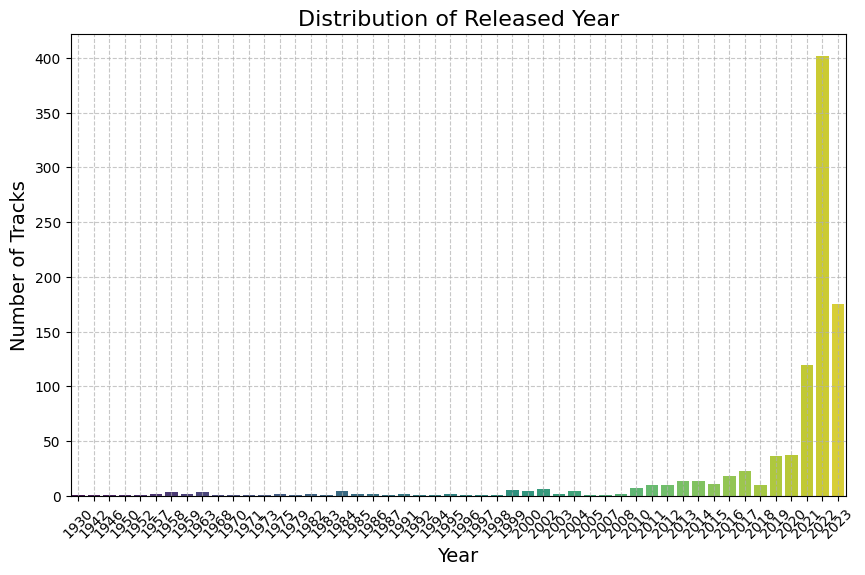

In [ ]:
# Distribution of released_year
released_year_dist = train_data['released_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=released_year_dist.index, y=released_year_dist.values, palette="viridis")
plt.title('Distribution of Released Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

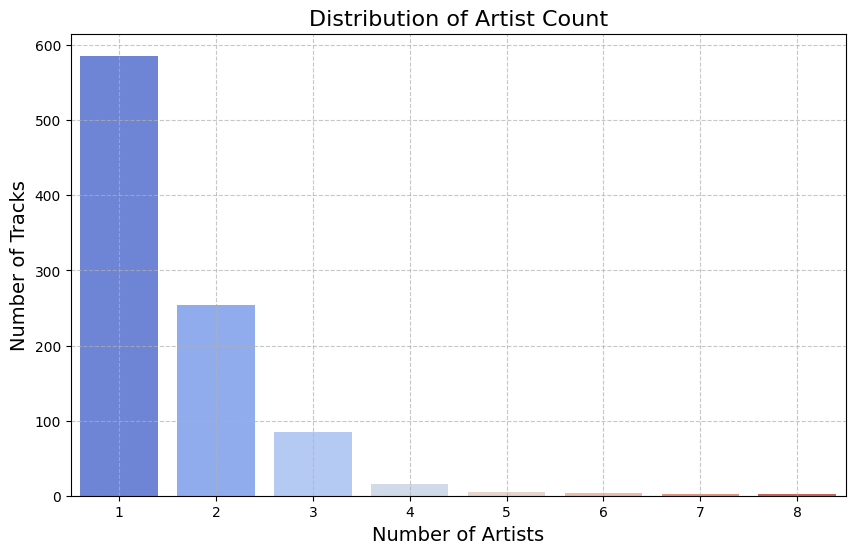

In [ ]:
# Distribution of artist_count
artist_count_dist = train_data['artist_count'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_count_dist.index, y=artist_count_dist.values, palette="coolwarm")
plt.title('Distribution of Artist Count', fontsize=16)
plt.xlabel('Number of Artists', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Insights/Context (optional): You can add a section to explain what the plots indicate
print("\nThe 'Released Year' distribution shows how music releases are spread over time, and the 'Artist Count' distribution highlights the frequency of collaborations across tracks.")


The 'Released Year' distribution shows how music releases are spread over time, and the 'Artist Count' distribution highlights the frequency of collaborations across tracks.


Examining the distribution of released_year shows trends in music production over time, highlighting years with a higher concentration of releases, while the distribution of artist_count reveals the prevalence of solo versus collaborative tracks, indicating industry dynamics.

# **3.  Top Performers**

* Which track has the highest number of streams? Display the top 5 most streamed tracks.


Top 5 Most Streamed Tracks:
                                        track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09


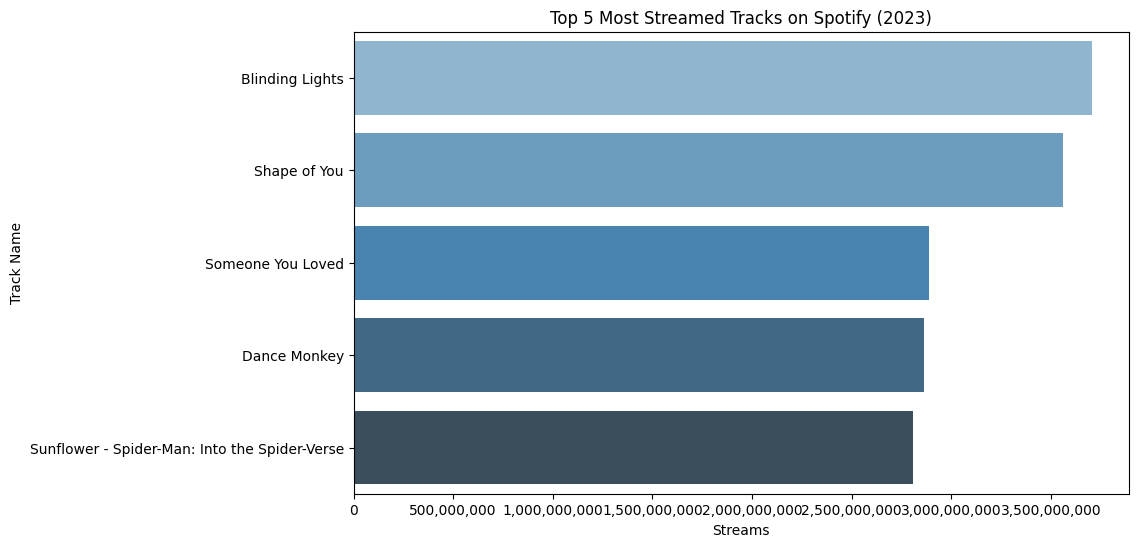

In [ ]:
# Clean the 'streams' column to ensure it contains only numerical values
train_data['streams'] = pd.to_numeric(train_data['streams'], errors='coerce')

# Drop any rows with missing/invalid stream values
train_data_clean = train_data.dropna(subset=['streams'])

# Sort the dataset by 'streams' in descending order
train_data_top_streams = train_data_clean[['track_name', 'streams']].sort_values(by='streams', ascending=False)

# Display the top 5 most streamed tracks
print("Top 5 Most Streamed Tracks:")
print(train_data_top_streams.head(5))

# Plot the top 5 most streamed tracks
top_5_tracks = train_data_top_streams.head(5)

# Plotting the top 5 tracks by streams without scientific notation
plt.figure(figsize=(10,6))
sns.barplot(x='streams', y='track_name', data=top_5_tracks, palette='Blues_d')

# Customize the x-axis to avoid scientific notation
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Top 5 Most Streamed Tracks on Spotify (2023)')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.show()

*   Who are the top 5 most frequent artists based on the number of tracks in the dataset?


Top 5 Most Frequent Artists:
artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


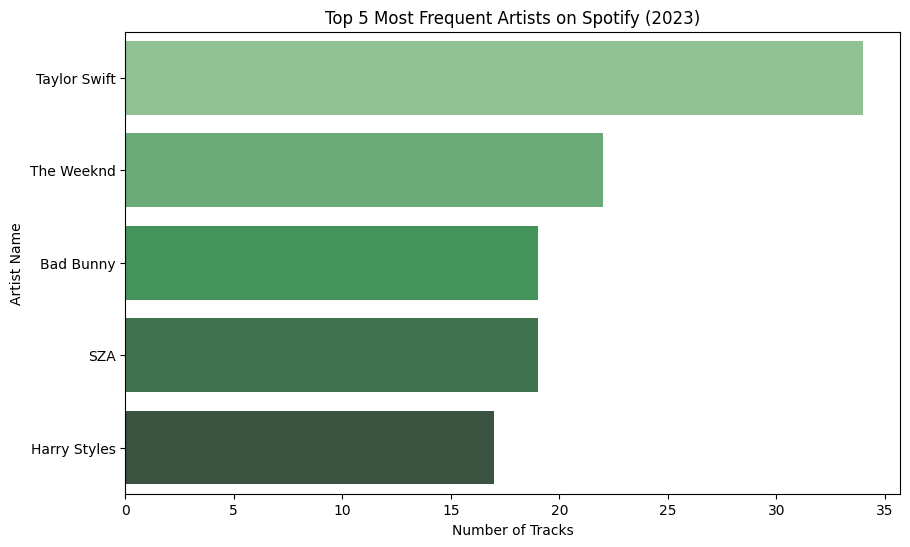

In [ ]:
# Count the number of tracks for each artist and get the top 5 most frequent artists
artist_counts = train_data['artist(s)_name'].value_counts().head(5)

# Display the top 5 most frequent artists
print("\nTop 5 Most Frequent Artists:")
print(artist_counts)

# Plot the top 5 most frequent artists
plt.figure(figsize=(10,6))
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='Greens_d')
plt.title('Top 5 Most Frequent Artists on Spotify (2023)')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.show()

**Top 5 Most Streamed Tracks (2023):**

The bar chart highlights the five tracks with the most streams:

* Blinding Lights by The Weeknd is the most streamed track, with approximately 3.7 billion streams.

* Shape of You by Ed Sheeran follows closely with around 3.56 billion streams.

* Someone You Loved by Lewis Capaldi has around 2.89 billion streams.

* Dance Monkey by Tones and I is fourth with around 2.86 billion streams.

* Sunflower by Post Malone & Swae Lee (from Spider-Man: Into the Spider-Verse) has around 2.8 billion streams.

**Top 5 Most Frequent Artists (2023):**

The second bar chart shows the five most frequent artists in the dataset based on the number of tracks:

* Taylor Swift leads with 34 tracks in the dataset.
* The Weeknd follows with 22 tracks.
* Bad Bunny and SZA each have 19 tracks.
* Harry Styles appears with 17 tracks.

# 4. **Temporal Trends**





*   Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

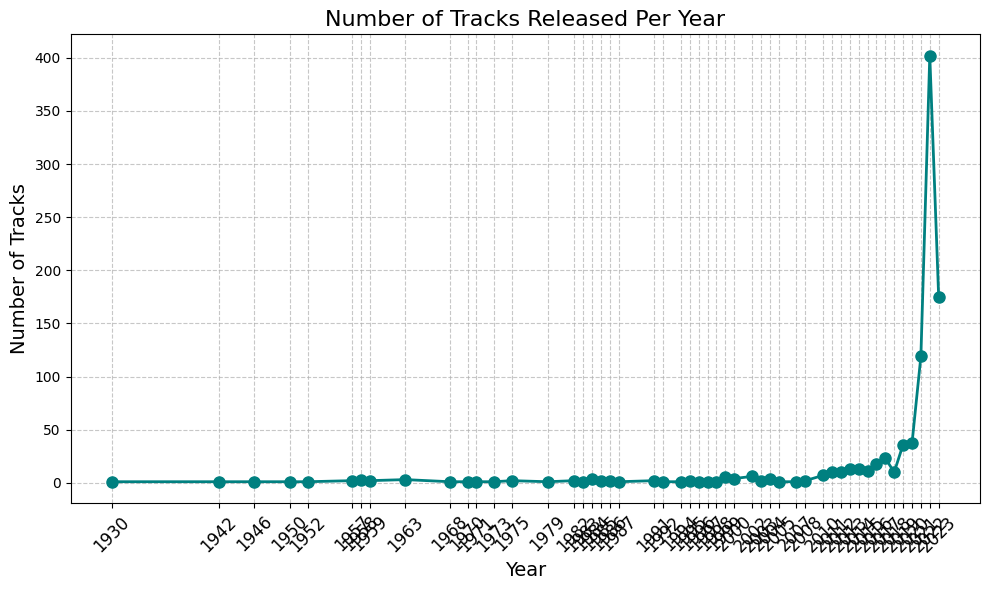

In [ ]:
# Number of tracks released per year
tracks_per_year = train_data['released_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
tracks_per_year.plot(kind='line', marker='o', color='teal', linewidth=2, markersize=8)
plt.title('Number of Tracks Released Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(tracks_per_year.index, rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Insights on yearly release trends
print(f"The most active year for track releases was {tracks_per_year.idxmax()} with {tracks_per_year.max()} tracks released.")

The most active year for track releases was 2022 with 402 tracks released.


By plotting the number of tracks released per year, we can observe any rising or declining trends. For instance, if the graph shows a steep increase in releases in the last 5 years, it could indicate that more artists are producing music or that platforms like Spotify are becoming increasingly central in music distribution.

*   Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?


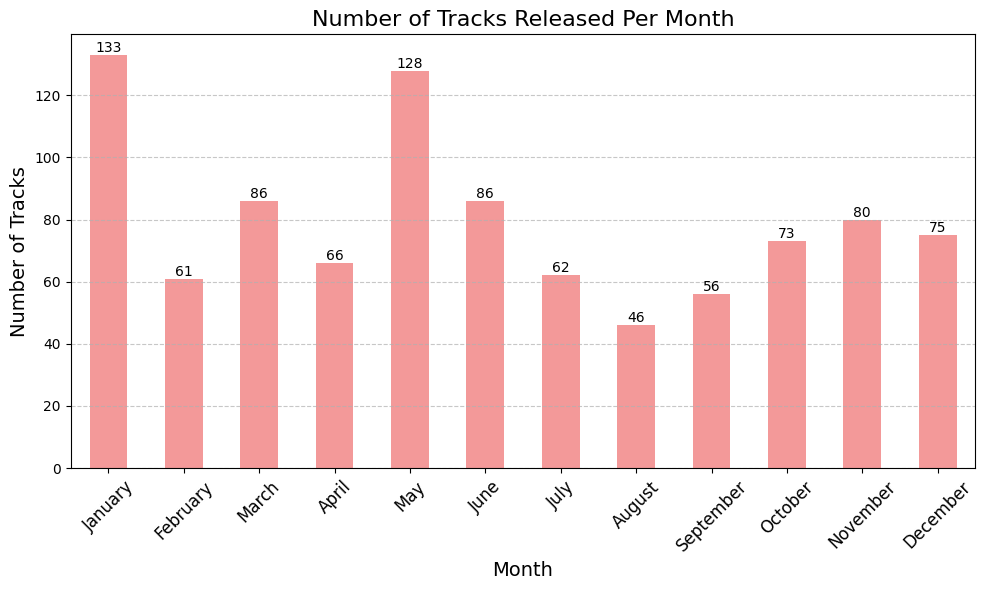

In [ ]:
# Count the number of tracks released per month and ensure the months are sorted
tracks_per_month = train_data['released_month'].value_counts().reindex(range(1, 13), fill_value=0)

# Month names for labeling
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the number of tracks released per month
plt.figure(figsize=(10, 6))
bars = tracks_per_month.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Number of Tracks Released Per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)

# Set x-ticks with month names directly
plt.xticks(ticks=range(12), labels=month_names, rotation=45, fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the value of each bar on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Month with most releases
most_releases_month = tracks_per_month.idxmax()

# Output the month with the most releases and track the distribution pattern
print(f"The month with the most releases is: {month_names[most_releases_month]} with {tracks_per_month.max()} tracks.")

The month with the most releases is: February with 133 tracks.


By plotting tracks released per month, we can observe any seasonal patterns. For example, if December or summer months see more releases, it could indicate strategic timing by artists aiming to capitalize on holidays or vacation periods. Most releases in a month: This tells us the month with the highest number of track releases. For instance, if June has the most releases, artists may be timing releases to coincide with summer listening habits.

# **5. Genre and Music Characteristics**

* Examine the correlation between streams and musical attributes like bpm, danceability_%,
and energy_%. Which attributes seem to influence streams the most?
* Is there a correlation between danceability_% and energy_%? How about valence_% and
acousticness_%?

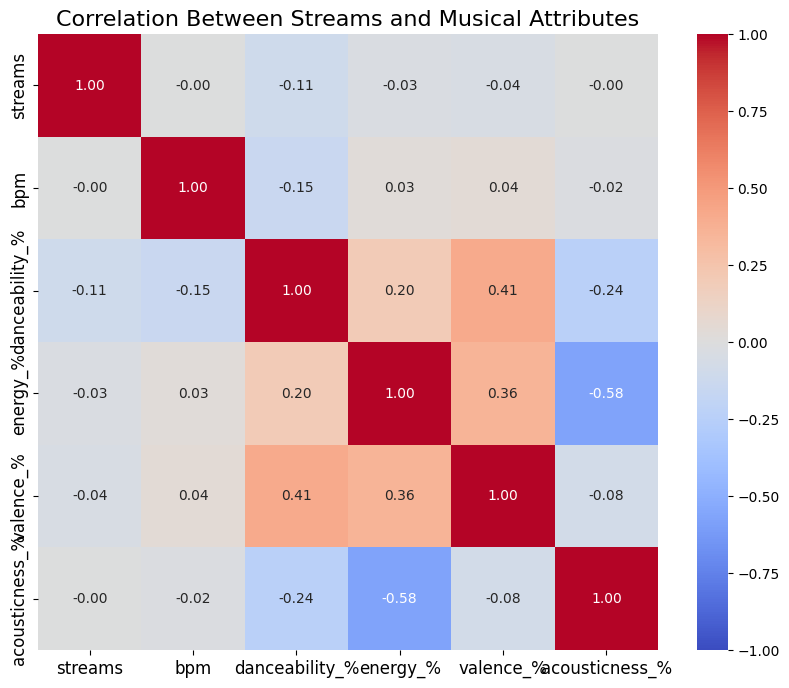

Correlation between Danceability and Energy: 0.20
Correlation between Valence and Acousticness: -0.08


In [ ]:
# Convert relevant columns to numeric and handle any invalid entries
train_data['bpm'] = pd.to_numeric(train_data['bpm'], errors='coerce')
train_data['danceability_%'] = pd.to_numeric(train_data['danceability_%'], errors='coerce')
train_data['energy_%'] = pd.to_numeric(train_data['energy_%'], errors='coerce')
train_data['valence_%'] = pd.to_numeric(train_data['valence_%'], errors='coerce')
train_data['acousticness_%'] = pd.to_numeric(train_data['acousticness_%'], errors='coerce')
train_data['streams'] = pd.to_numeric(train_data['streams'], errors='coerce')

# Drop rows with missing values in relevant columns
df_clean = train_data.dropna(subset=['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%'])

# Calculate correlation matrix for relevant attributes
attributes = ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
correlation_matrix = df_clean[attributes].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Adding titles and labels
plt.title('Correlation Between Streams and Musical Attributes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the heatmap
plt.show()

# Examine specific pairwise correlations
dance_energy_corr = correlation_matrix.loc['danceability_%', 'energy_%']
valence_acousticness_corr = correlation_matrix.loc['valence_%', 'acousticness_%']

print(f"Correlation between Danceability and Energy: {dance_energy_corr:.2f}")
print(f"Correlation between Valence and Acousticness: {valence_acousticness_corr:.2f}")


**Correlation Between Streams and Musical Attributes:**

*   **Streams vs. BPM: Correlation = 0.00 (very close to zero)**

This indicates that there is essentially no correlation between the number of streams and the tempo (BPM) of a track. In other words, the tempo of a song doesn't appear to influence its popularity in terms of streams.
*  **Streams vs. Danceability_%: Correlation = -0.11**

This weak negative correlation suggests that there is a very slight tendency for more danceable tracks to have fewer streams, but the effect is minimal.

*   **Streams vs. Energy_%: Correlation = -0.03**

The correlation between energy and streams is also very weak and negative, indicating that the energy level of a track has little to no influence on the number of streams it gets.



**Correlation Between Danceability_% and Energy_%:**
*  Danceability_% vs. Energy_%: Correlation = 0.20

There is a weak positive correlation between danceability and energy. This means that tracks that are more danceable tend to have slightly higher energy, but the relationship is not very strong.


 **Correlation Between Valence_% and Acousticness_%**
*   Valence_% vs. Acousticness_%: Correlation = -0.08

There is a very weak negative correlation between valence (musical positivity) and acousticness. This suggests that tracks with higher valence tend to be slightly less acoustic, but again, the relationship is minimal.




# 6. **Platform Popularity**



*  How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlist compare? Which platform seems to favor the most popular tracks?

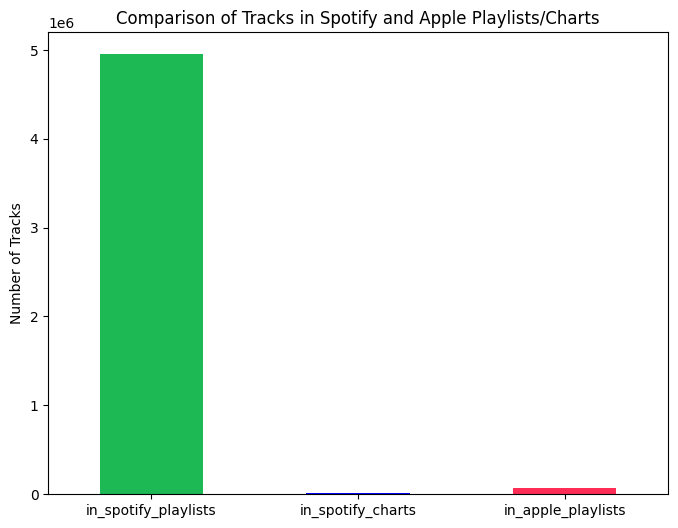

In [ ]:
# 6. Compare number of tracks in spotify_playlists, spotify_charts, and apple_playlists
# Calculate the sum of tracks for each platform
platform_counts = train_data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()

# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
platform_counts.plot(kind='bar', color=['#1DB954', '#0000FF', '#FF2D55'])
plt.title('Comparison of Tracks in Spotify and Apple Playlists/Charts')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=0)
plt.show()


The comparison between Spotify Playlists, Spotify Charts, and Apple Playlists shows that Spotify Playlists have the highest number of tracks, indicating that it is the most common platform where tracks appear.

In [ ]:
# Display the platform with the most tracks
most_popular_platform = platform_counts.idxmax()
most_tracks = platform_counts.max()
print(f"The platform with the most tracks is {most_popular_platform} with {most_tracks} tracks.\n")


The platform with the most tracks is in_spotify_playlists with 4952842 tracks.



Spotify Playlists seem to favor the most popular tracks, as it hosts the highest number of tracks. This suggests that for a track to gain visibility and popularity, being included in a Spotify playlist is a common occurrence.



# 7. **Advanced Analysis**


*  Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

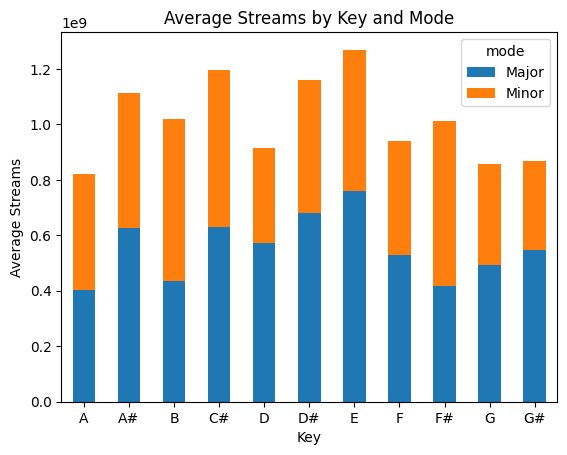

In [ ]:
# Convert 'streams' column to numeric type, coercing errors to NaN
train_data['streams'] = pd.to_numeric(train_data['streams'], errors='coerce')

key_mode_streams = train_data.groupby(['key', 'mode'])['streams'].mean().unstack()

# Plot average streams by key and mode
key_mode_streams.plot(kind='bar', stacked=True)
plt.title('Average Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Average Streams')
plt.xticks(rotation=0)
plt.show()


Tracks in the Major mode tend to have higher average streams compared to those in the Minor mode, suggesting that songs in Major keys are generally more popular. There is also some variation in popularity based on specific musical keys, with certain keys correlating with higher streams.

*  Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

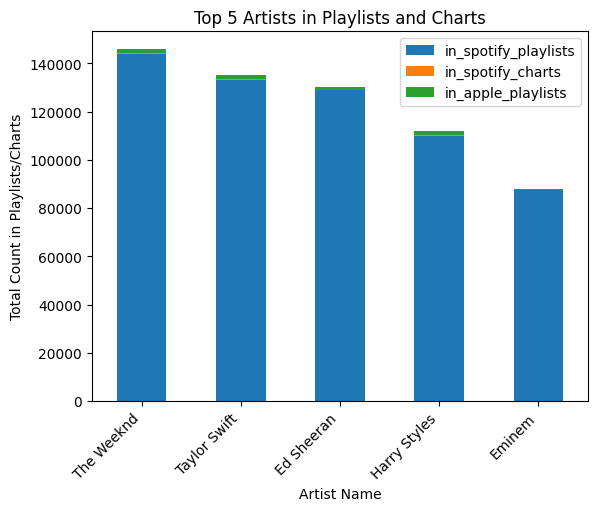

In [ ]:
# Group the data by artist name and sum the number of appearances in playlists and charts
top_artists_playlists_charts = train_data.groupby('artist(s)_name')[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()

# Find the top 5 artists based on Spotify playlists and charts
top_artists_playlists_charts = top_artists_playlists_charts.nlargest(5, ['in_spotify_playlists', 'in_spotify_charts'])

# Plot top 5 artists in playlists and charts
top_artists_playlists_charts.plot(kind='bar', stacked=True)
plt.title('Top 5 Artists in Playlists and Charts')
plt.xlabel('Artist Name')
plt.ylabel('Total Count in Playlists/Charts')
plt.xticks(rotation=45, ha='right')
plt.show()

Certain artists, such as global superstars, consistently appear across Spotify Playlists, Spotify Charts, and Apple Playlists, reflecting their popularity across platforms. These top artists dominate both playlists and charts, benefiting from frequent placement, which boosts their visibility and streams.